In [ ]:
import numpy as np
import pandas as pd
import datetime
import time
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.losses import MSE
from sklearn.metrics import mean_squared_error as mse
import seaborn as sb
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# New section

In [ ]:
df = pd.read_csv('/content/EL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-30,260.730011,262.579987,254.789993,257.109985,254.764359,981400
1,2022-08-31,258.290009,259.350006,254.339996,254.380005,252.059296,1492600
2,2022-09-01,252.160004,252.750000,247.080002,251.179993,248.888458,1854700
3,2022-09-02,255.360001,255.800003,246.850006,248.320007,246.054581,1027600
4,2022-09-06,249.320007,251.160004,244.889999,246.149994,243.904358,1439700


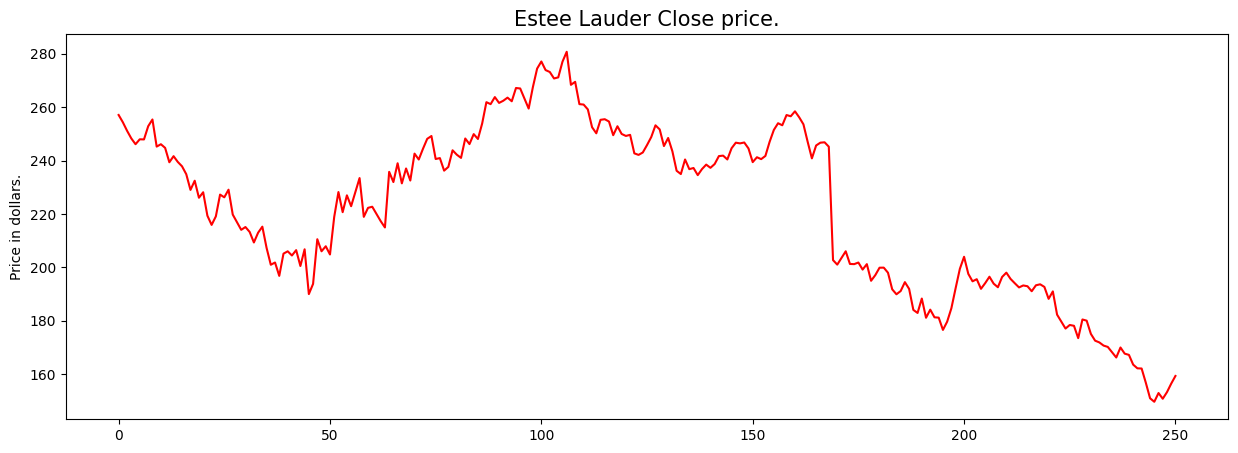

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'],color="red")
plt.title('Estee Lauder Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2022-08-30,260.730011,262.579987,254.789993,257.109985,254.764359,981400,30,8,2022
1,2022-08-31,258.290009,259.350006,254.339996,254.380005,252.059296,1492600,31,8,2022
2,2022-09-01,252.160004,252.750000,247.080002,251.179993,248.888458,1854700,1,9,2022
3,2022-09-02,255.360001,255.800003,246.850006,248.320007,246.054581,1027600,2,9,2022
4,2022-09-06,249.320007,251.160004,244.889999,246.149994,243.904358,1439700,6,9,2022


In [ ]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['Adj Close-Volume'] = df['Adj Close'] - df['Volume']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

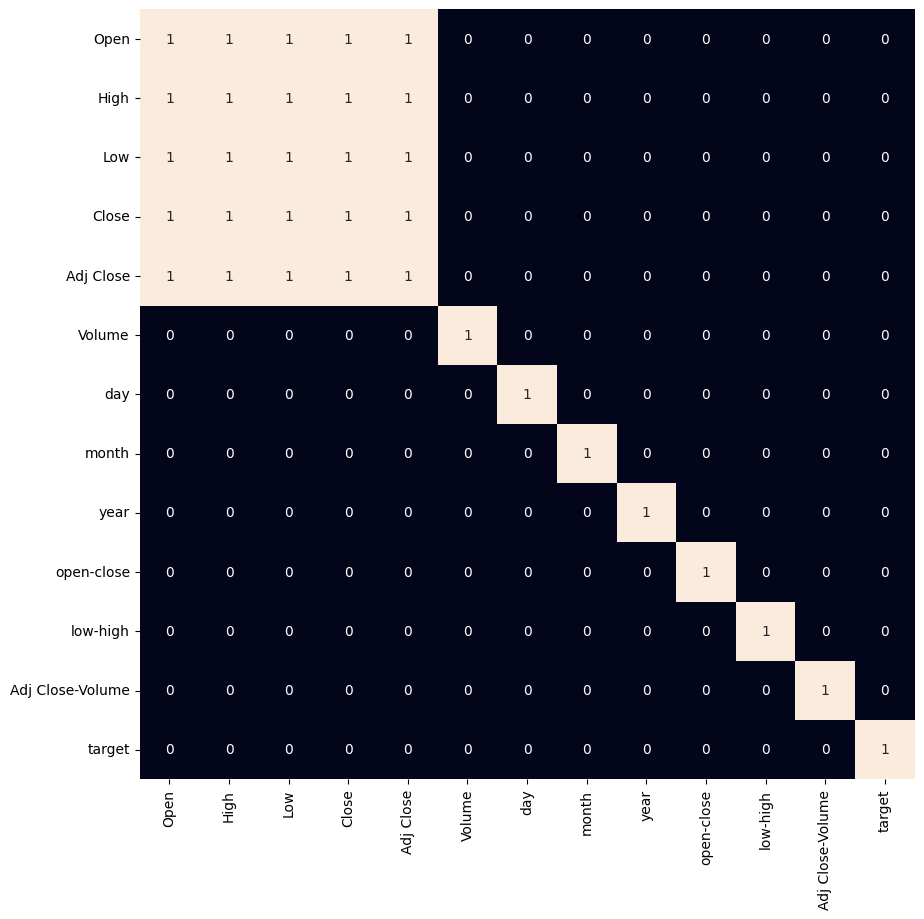

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
features = df[['open-close', 'low-high', 'Adj Close-Volume']]
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2021)
print(X_train.shape, X_valid.shape)

(225, 3) (26, 3)


In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5896700143472023
validation Accuracy :  0.42261904761904756

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5579467559381476
validation Accuracy :  0.4107142857142857

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accur

In [ ]:
#we are going define our test and train dataset using create using create dataset which makes new x and y datasets
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
scaler = StandardScaler()
close = np.array(df['Close'])
close = scaler.fit_transform(close.reshape(-1, 1))
close

array([[ 1.11476097],
       [ 1.02850604],
       [ 0.92740025],
       [ 0.83703773],
       [ 0.76847521],
       [ 0.82661117],
       [ 0.8250313 ],
       [ 0.98174444],
       [ 1.06136508],
       [ 0.7403553 ],
       [ 0.76815942],
       [ 0.72518961],
       [ 0.55457442],
       [ 0.626612  ],
       [ 0.55836572],
       [ 0.50654922],
       [ 0.41334277],
       [ 0.22724562],
       [ 0.33593403],
       [ 0.13435495],
       [ 0.19944147],
       [-0.07828224],
       [-0.18728689],
       [-0.08649737],
       [ 0.17163735],
       [ 0.13941032],
       [ 0.22977331],
       [-0.06501222],
       [-0.15569145],
       [-0.24573817],
       [-0.21256287],
       [-0.27069883],
       [-0.39550072],
       [-0.27954552],
       [-0.20813954],
       [-0.45932367],
       [-0.65963865],
       [-0.63278233],
       [-0.79107581],
       [-0.52788572],
       [-0.50008157],
       [-0.54968664],
       [-0.48617951],
       [-0.6741723 ],
       [-0.47606919],
       [-1

In [ ]:
train_size = int(len(close) * 0.7)
test_size = len(close) - train_size
train, test = close[0:train_size, :], close[train_size:len(close), :]
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(100, return_sequences=True, input_shape=(1, look_back)))
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, validation_split=0.33 , batch_size=1, verbose=1)
model.save('stock.h5')

Epoch 1/10
109/109 [==============================] - 3s 9ms/step - loss: 0.1920 - val_loss: 0.1327
Epoch 2/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0569 - val_loss: 0.0755
Epoch 3/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0547 - val_loss: 0.0700
Epoch 4/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0449 - val_loss: 0.0691
Epoch 5/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0455 - val_loss: 0.0705
Epoch 6/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0406 - val_loss: 0.0540
Epoch 7/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0415 - val_loss: 0.0557
Epoch 8/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0398 - val_loss: 0.0673
Epoch 9/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0387 - val_loss: 0.0558
Epoch 10/10
109/109 [==============================] - 0s 3ms/step - loss: 0.0396 - val_loss: 0.0532

In [ ]:
predicted = model.predict(testX)
print('MSE for predicted', mse(np.array(testY).reshape(-1), np.array(predicted).reshape(-1)))

3/3 [==============================] - 1s 4ms/step
MSE for predicted 0.2282110189741823


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = np.reshape(trainPredict, (trainPredict.shape[0], trainPredict.shape[2]))
testPredict = np.reshape(testPredict, (testPredict.shape[0], testPredict.shape[2]))

3/3 [==============================] - 0s 8ms/step


In [ ]:
trainPredictPlot = np.empty_like(close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot = trainPredictPlot.reshape(-1)
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict.reshape(-1)
testPredictPlot = np.empty_like(close)
testPredictPlot[:, :] = np.nan
testPredictPlot = testPredictPlot.reshape(-1)
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(close)-1] = testPredict.reshape(-1)

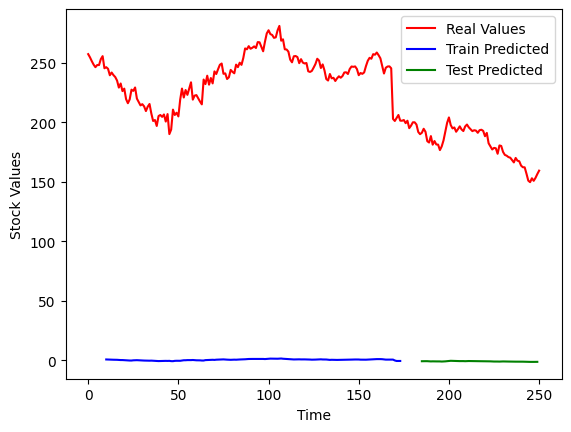

In [ ]:
plt.plot(df['Close'],color="red",label="Real Values")
plt.plot(trainPredictPlot,color="blue",label="Train Predicted")
plt.plot(testPredictPlot,color="green",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Stock Values")
plt.legend()
plt.show()

In [ ]:
y_test_dummies = pd.get_dummies(testY).values
from keras.models import load_model
model = load_model('stock.h5')
scores = model.evaluate(testX, y_test_dummies)
print('Test accuracy: ', scores*100, '%')

3/3 [==============================] - 1s 5ms/step - loss: 0.8801
Test accuracy:  88.00632357597351 %
